In [99]:
#matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Maximum
from keras.utils import plot_model
from keras.layers import Reshape
from keras.layers import Lambda
from keras.models import Model
from keras.backend import exp, min, max, square
from keras import initializers

#model =  Sequential() # create model

In [105]:
SEED = 1

In [111]:
#from keras.layers import concatenate
from keras.layers import Input, Lambda

input1 = Input(shape=(10,), name='1974852016')
dense_918 = Dense(units=20, input_dim=10, name="dense_918", kernel_initializer=initializers.glorot_uniform(seed=SEED))(input1)
dropout_03 = Dropout(rate=0.3, name='Dropout_0.3')(dense_918)
min_plus_square = Lambda(lambda x:min(x)+ square(x))(dropout_03)


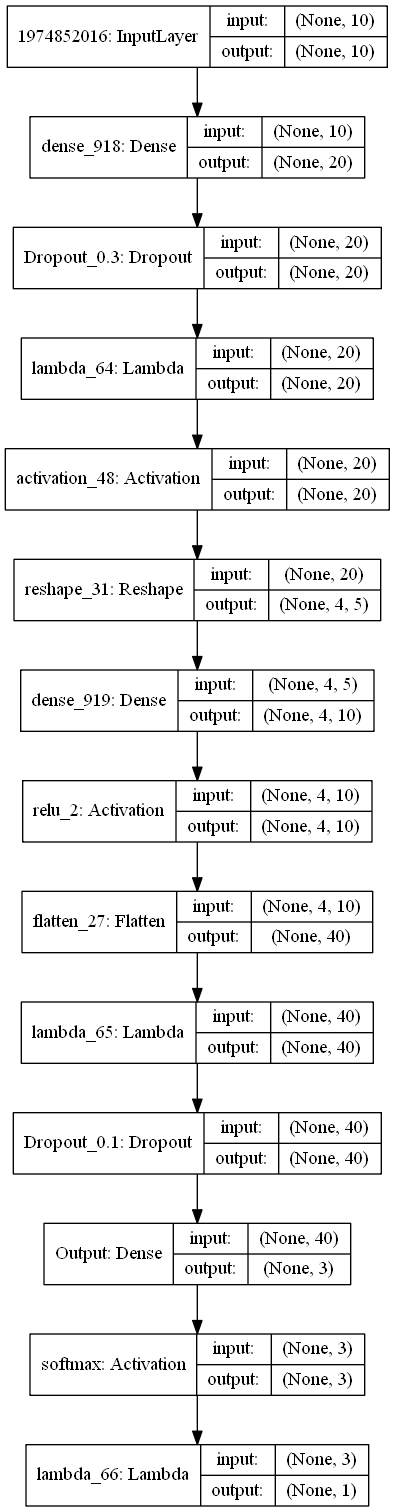

In [112]:
relu = Activation('relu')(min_plus_square)
reshape = Reshape((4, 5))(relu)
dense_919 = Dense(units=10, input_dim=10, name="dense_919", kernel_initializer=initializers.glorot_uniform(seed=SEED))(reshape)
relu_2 = Activation('relu', name='relu_2')(dense_919)
flatten_771 = Flatten()(relu_2)
expl = Lambda(lambda x: exp(x))(flatten_771)
dropout_01 = Dropout(rate=0.1, name='Dropout_0.1')(expl)
output_dense = Dense(units=3, input_dim=10, name="Output", kernel_initializer=initializers.glorot_uniform(seed=SEED))(dropout_01)
softmax = Activation('softmax', name='softmax')(output_dense)
maxl = Lambda(lambda x: max(x, axis=1, keepdims=True))(softmax)
output = maxl

model2 = Model(inputs=input1, outputs=output)
plot_model(model2, to_file='model_2_inputs.png',show_shapes=True,show_layer_names=True)


In [113]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [114]:
import numpy as np
data = np.ones((1,10))
model2.predict(data)

array([[0.763344]], dtype=float32)